In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from numpy import linalg as LA
import pandas as pd
from scipy import stats
from sklearn import preprocessing
import seaborn as sns

In [62]:
#gene expression dataframe
counts=pd.read_csv('countsNormLog.csv')

counts = counts.set_index('Gene')

In [63]:
#calculate variance for each row and add as new column
counts['variance'] = counts.var(axis=1)

#sort by variance
counts.sort_values(by='variance', ascending=False, inplace=True)
counts
#take top 10540 (approx 25%) of highest variance
counts25pca = counts.head(10540)

#delete variance column
counts25pca = counts25pca.drop('variance', axis = 1)

In [38]:
counts25pca

,R15181,R15183_merged,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21863.1,R21864,R21866,R21868,R21869,R21870,R21871,R21872,R21873,R21874
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000259976.3,-2.519063,-2.558822,1.065913,0.788256,-2.603460,-2.671445,-2.639801,1.027146,0.906429,-2.495750,...,-2.555105,0.649831,-2.650464,-2.714947,0.879852,-2.377452,-2.574671,-2.563155,-2.685440,0.904112
ENSG00000260075.1,1.244365,-2.558822,-2.406844,-2.700295,-2.603460,1.412058,-2.639801,1.592462,1.223812,1.125426,...,-0.953045,-2.622010,-2.650464,-2.714947,-2.649065,-2.377452,0.901000,-0.058005,-2.685440,-2.738353
ENSG00000260186.5,0.093720,0.436813,0.931613,0.785427,1.042944,1.191283,1.050396,0.978503,1.208972,1.123343,...,-1.555105,-2.622010,-1.650464,-2.714947,-1.649065,-2.377452,-1.273641,-1.086034,-2.685440,-2.738353
ENSG00000134184.13,1.209290,-2.558822,-2.406844,-1.700295,-2.603460,1.668801,1.236994,-1.452861,1.269472,-1.495750,...,-2.555105,-1.622010,1.078700,1.092588,-1.649065,1.018748,1.107474,-2.563155,1.285371,1.132636
ENSG00000196273.8,0.300480,0.131374,0.826152,0.746863,0.632069,0.652838,0.791563,0.869359,0.769890,0.644129,...,-2.555105,-2.622010,-2.650464,-2.714947,-2.649065,-2.377452,-2.574671,-2.563155,-2.685440,-2.738353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286978.1,-2.519063,-2.558822,-2.406844,-1.223173,-1.603460,-2.671445,-2.639801,-1.452861,-2.727039,-1.495750,...,-2.555105,-2.622010,-2.650464,-2.714947,-2.649065,-2.377452,-2.574671,-2.563155,-2.685440,-2.738353
ENSG00000215866.9,-2.519063,-1.081701,-1.105814,-1.223173,-2.603460,-2.671445,-1.037741,-0.674709,-0.948888,-1.018629,...,-1.555105,-1.320980,-1.173343,-1.112887,-1.649065,-2.377452,-0.671581,-2.563155,-0.986470,-1.039383
ENSG00000287744.1,-2.519063,-1.558822,-1.105814,-1.700295,-2.603460,-1.671445,-1.639801,-1.151831,-1.426009,-2.495750,...,-2.555105,-2.622010,-1.349434,-2.714947,-2.649065,-2.377452,-1.273641,-2.563155,-2.685440,-2.738353


In [6]:
#transpose selected counts data
transposecounts25pca = counts25pca.T.values
transposecounts25pca = preprocessing.StandardScaler().fit_transform(transposecounts25pca)

In [37]:
transposecounts25pca

array([[-0.94935853,  1.09106327,  0.43208136, ..., -0.60861304,
        -0.65636725, -0.63736748],
       [-0.97156626, -1.04072616,  0.65382278, ...,  1.17594623,
         0.15646518,  1.70669767],
       [ 1.05308538, -0.95553827,  0.97361243, ...,  2.01783849,
         0.11165132,  2.31641261],
       ...,
       [-0.97398669,  0.36104958, -0.33039573, ..., -0.69055538,
        -0.73831124, -0.71931182],
       [-1.04229096, -1.11169924, -1.36409456, ..., -0.91781605,
         0.80786964, -0.94657802],
       [ 0.96270892, -1.14135812, -1.39829198, ..., -1.01615115,
         0.05500636, -1.04491552]])

In [53]:
#import series matrix
annot=pd.read_csv('series matrix.csv')
annot = annot.set_index('!Sample_title')
annot

,R15181,R15183,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21863,R21864,R21866,R21868,R21869,R21870,R21871,R21872,R21873,R21874
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_geo_accession,GSM8015128,GSM8015129,GSM8015130,GSM8015131,GSM8015132,GSM8015133,GSM8015134,GSM8015135,GSM8015136,GSM8015137,...,GSM8015312,GSM8015313,GSM8015314,GSM8015315,GSM8015316,GSM8015317,GSM8015318,GSM8015319,GSM8015320,GSM8015321
!Sample_source_name_ch1,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,...,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC
!Sample_characteristics_ch1,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,...,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC
!Sample_characteristics_ch1,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,...,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case
!Sample_characteristics_ch1,Sex: M,Sex: M,Sex: M,Sex: F,Sex: M,Sex: F,Sex: M,Sex: M,Sex: M,Sex: M,...,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M
!Sample_characteristics_ch1,agedeath: 31.54,agedeath: 35.25,agedeath: 61.75,agedeath: 38.39,agedeath: 46.79,agedeath: 52.69,agedeath: 38.99,agedeath: 65.59057723,agedeath: 52.92,agedeath: 43.11,...,agedeath: 37.42379649,agedeath: 44.77481177,agedeath: 64.26009582,agedeath: 57.05692448,agedeath: 65.65377595,agedeath: 78.03958476,agedeath: 48.02190281,agedeath: 57.62069359,agedeath: 36.53661875,agedeath: 37.00205339
!Sample_characteristics_ch1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,...,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1
!Sample_characteristics_ch1,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,...,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,current smoker at death: Control
!Sample_characteristics_ch1,pmi: 25,pmi: 16,pmi: 22.5,pmi: 41,pmi: 21,pmi: 23.5,pmi: 32,pmi: 27,pmi: 28,pmi: 16,...,pmi: 33,pmi: 23.5,pmi: 22,pmi: 37.5,pmi: 31,pmi: 35.5,pmi: 30.5,pmi: 32,pmi: 24,pmi: 13


# Look at AUD vs non-AUD

In [12]:
#grab specific row
audstatus = pd.Series(annot.iloc[3].values, index = list(annot.columns))
audstatus

R15181    dsm-5 aud status: non_AUD_Control
R15183    dsm-5 aud status: non_AUD_Control
R15207    dsm-5 aud status: non_AUD_Control
R15274    dsm-5 aud status: non_AUD_Control
R15394    dsm-5 aud status: non_AUD_Control
                        ...                
R21870    dsm-5 aud status: non_AUD_Control
R21871           dsm-5 aud status: AUD_Case
R21872           dsm-5 aud status: AUD_Case
R21873           dsm-5 aud status: AUD_Case
R21874           dsm-5 aud status: AUD_Case
Length: 194, dtype: object

In [13]:
#assign value based on control/case
colorsAUD = {'dsm-5 aud status: non_AUD_Control':0, 'dsm-5 aud status: AUD_Case':1}
cAUD=audstatus.map(colorsAUD)
cAUD

R15181    0
R15183    0
R15207    0
R15274    0
R15394    0
         ..
R21870    0
R21871    1
R21872    1
R21873    1
R21874    1
Length: 194, dtype: int64

In [14]:
# make PCA
pcaAUD = PCA()
AUDcountsPCA = pcaAUD.fit_transform(transposecounts25pca)
variance_explained=pcaAUD.explained_variance_ratio_
pc1_variance=pcaAUD.explained_variance_ratio_[0]
pc2_variance=pcaAUD.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

13.999911784376822 5.714668752167194


In [15]:
AUDcountsPCA

array([[ 6.36841636e+00,  1.53113647e+01,  3.38612876e+01, ...,
         4.41570215e+00,  5.04322266e+00,  1.51708763e-14],
       [ 2.69517751e+01,  1.46395722e+01,  4.63226698e+01, ...,
        -1.13956555e+01, -6.83292384e-01,  1.51708763e-14],
       [ 3.91412872e+01, -1.13968134e+01, -4.62827258e+00, ...,
        -2.74631706e-01, -4.77948670e+00,  1.51708763e-14],
       ...,
       [-4.34288990e+01, -1.05489478e+01, -5.59770945e+00, ...,
         6.58888456e+00,  1.56294471e+00,  1.51708763e-14],
       [-4.48124197e+01, -9.15537435e+00, -7.50597311e+00, ...,
        -6.89257939e+00,  2.22239498e+00,  1.51708763e-14],
       [-4.46013587e+01, -1.41664596e+01, -2.90571905e+00, ...,
        -6.10761333e-01,  6.18264648e+00,  1.51708763e-14]])

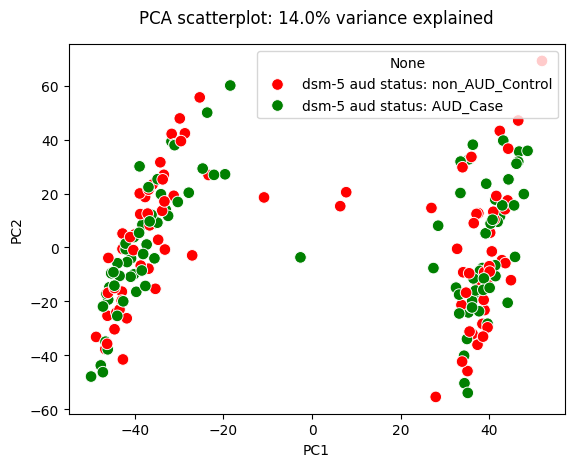

In [16]:
#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=AUDcountsPCA[:, 0], y=AUDcountsPCA[:, 1], s=70, hue=audstatus, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

# Look at Male vs Female

13.999911784376822 5.714668752167194


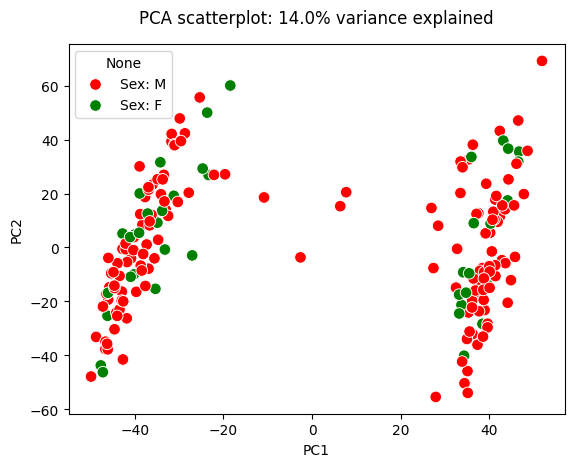

In [17]:
#grab specific row
gender = pd.Series(annot.iloc[4].values, index = list(annot.columns))
gender

#assign value based on control/case
colorsGender = {'Sex: M':0, 'Sex: F':1}
cGender=gender.map(colorsGender)
cGender

# make PCA
pcaGender = PCA()
GendercountsPCA = pcaGender.fit_transform(transposecounts25pca)
variance_explained=pcaGender.explained_variance_ratio_
pc1_variance=pcaGender.explained_variance_ratio_[0]
pc2_variance=pcaGender.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=GendercountsPCA[:, 0], y=GendercountsPCA[:, 1], s=70, hue=gender, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

# Look at Depressed vs Non-Depressed

13.999911784376822 5.714668752167194


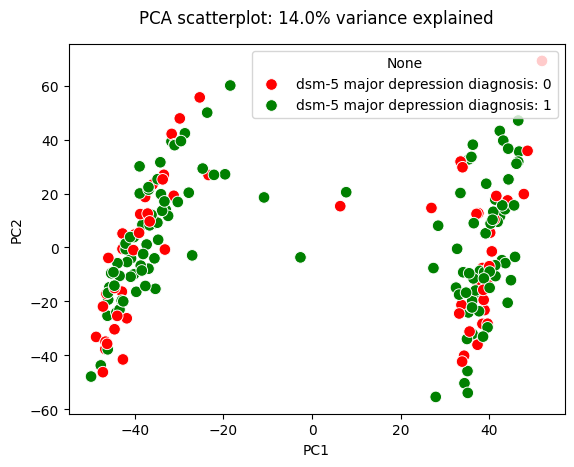

In [18]:
#grab specific row
depressionStatus = pd.Series(annot.iloc[6].values, index = list(annot.columns))
depressionStatus

#assign value based on control/case
colorsDepressed = {'dsm-5 major depression diagnosis: 0':0, 'dsm-5 major depression diagnosis: 1':1}
cDepressed=gender.map(colorsDepressed)
cDepressed

# make PCA
pcaDepressed = PCA()
DepressedcountsPCA = pcaDepressed.fit_transform(transposecounts25pca)
variance_explained=pcaDepressed.explained_variance_ratio_
pc1_variance=pcaDepressed.explained_variance_ratio_[0]
pc2_variance=pcaDepressed.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=DepressedcountsPCA[:, 0], y=DepressedcountsPCA[:, 1], s=70, hue=depressionStatus, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

# Look at Smoker vs Non-Smoker

13.999911784376822 5.714668752167194


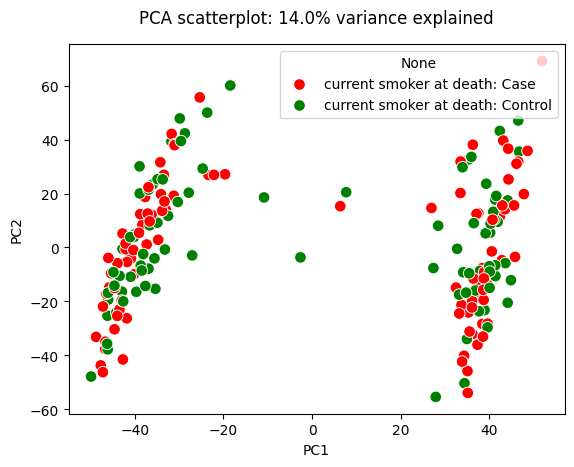

In [19]:
#grab specific row
smokingStatus = pd.Series(annot.iloc[7].values, index = list(annot.columns))
smokingStatus

#assign value based on control/case
colorsSmoke = {'current smoker at death: Control':0, 'current smoker at death: Case':1}
cSmoke=gender.map(colorsSmoke)
cSmoke

# make PCA
pcaSmoke = PCA()
SmokecountsPCA = pcaSmoke.fit_transform(transposecounts25pca)
variance_explained=pcaSmoke.explained_variance_ratio_
pc1_variance=pcaSmoke.explained_variance_ratio_[0]
pc2_variance=pcaSmoke.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=SmokecountsPCA[:, 0], y=SmokecountsPCA[:, 1], s=70, hue=smokingStatus, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

# Look at Brain Regions

13.999911784376822 5.714668752167194


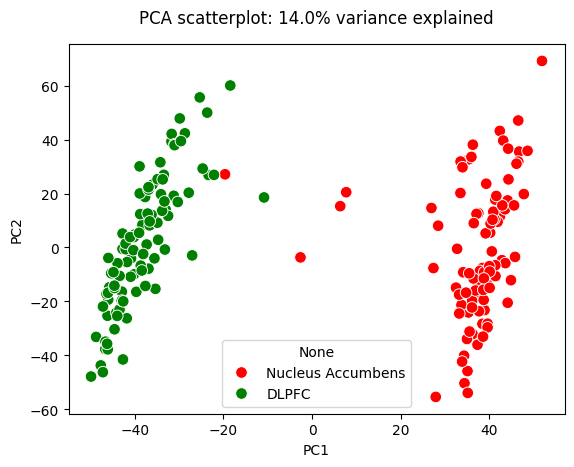

In [20]:
#grab specific row
brainRegion = pd.Series(annot.iloc[1].values, index = list(annot.columns))
brainRegion

#assign value based on control/case
colorsBrain = {'Nucleus Accumbens':0, 'DLPFC':1}
cBrain=brainRegion.map(colorsBrain)
cBrain

# make PCA
pcaBrain = PCA()
BraincountsPCA = pcaBrain.fit_transform(transposecounts25pca)
variance_explained=pcaBrain.explained_variance_ratio_
pc1_variance=pcaBrain.explained_variance_ratio_[0]
pc2_variance=pcaBrain.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=BraincountsPCA[:, 0], y=BraincountsPCA[:, 1], s=70, hue=brainRegion, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

# Filter for PFC

In [65]:
# filter counts to only have samples in the NAc
bool_PFC = annot.iloc[1] == 'DLPFC'
counts = counts.drop('variance', axis = 1)
counts.columns = bool_PFC.index
counts_PFC = counts.loc[:,bool_PFC]

In [66]:
counts_PFC

,R15899,R15908,R15915,R15973,R15977,R15981,R16002,R16078,R16099,R16102,...,R21863,R21864,R21866,R21868,R21869,R21870,R21871,R21872,R21873,R21874
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000259976.3,0.631940,-2.554381,-2.564994,-2.515617,-2.664163,-2.352163,0.930524,1.009237,1.405648,-2.546907,...,-2.555105,0.649831,-2.650464,-2.714947,0.879852,-2.377452,-2.574671,-2.563155,-2.685440,0.904112
ENSG00000260075.1,-2.671256,0.244959,1.461131,-2.515617,-2.664163,1.360486,1.060821,-2.354375,1.161054,-2.546907,...,-0.953045,-2.622010,-2.650464,-2.714947,-2.649065,-2.377452,0.901000,-0.058005,-2.685440,-2.738353
ENSG00000260186.5,-2.671256,-1.554381,-2.564994,-2.515617,-1.664163,-2.352163,-1.715880,-1.053345,-1.438829,-2.546907,...,-1.555105,-2.622010,-1.650464,-2.714947,-1.649065,-2.377452,-1.273641,-1.086034,-2.685440,-2.738353
ENSG00000134184.13,0.974166,-1.253351,1.110785,-2.515617,-1.363133,1.007672,-1.715880,-1.053345,1.367351,0.964976,...,-2.555105,-1.622010,1.078700,1.092588,-1.649065,1.018748,1.107474,-2.563155,1.285371,1.132636
ENSG00000196273.8,-2.671256,-1.554381,-2.564994,-1.214587,-1.664163,-2.352163,-2.715880,-2.354375,-1.438829,-2.546907,...,-2.555105,-2.622010,-2.650464,-2.714947,-2.649065,-2.377452,-2.574671,-2.563155,-2.685440,-2.738353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198218.11,1.778685,1.757372,1.679036,1.715343,1.733777,1.796748,1.723453,1.750113,1.704498,1.734581,...,1.744184,1.723167,1.720419,1.705174,1.732231,1.745419,1.671827,1.764408,1.737478,1.688484
ENSG00000204435.15,1.525749,1.473376,1.535377,1.495953,1.517966,1.542153,1.522417,1.516614,1.507623,1.506172,...,1.445329,1.508001,1.512995,1.486724,1.490184,1.525638,1.490535,1.478632,1.504331,1.466038
ENSG00000180304.14,1.808463,1.833720,1.822574,1.718140,1.839492,1.800125,1.815344,1.782663,1.845827,1.841550,...,1.744620,1.829162,1.846327,1.811134,1.837224,1.792223,1.815910,1.820840,1.838046,1.831840


In [69]:
# filter annot for only NAc
annot_PFC = annot.loc[:, bool_PFC]

In [70]:
annot_PFC

,R15899,R15908,R15915,R15973,R15977,R15981,R16002,R16078,R16099,R16102,...,R21863,R21864,R21866,R21868,R21869,R21870,R21871,R21872,R21873,R21874
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_geo_accession,GSM8015226,GSM8015227,GSM8015228,GSM8015229,GSM8015230,GSM8015231,GSM8015232,GSM8015233,GSM8015234,GSM8015235,...,GSM8015312,GSM8015313,GSM8015314,GSM8015315,GSM8015316,GSM8015317,GSM8015318,GSM8015319,GSM8015320,GSM8015321
!Sample_source_name_ch1,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,...,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC
!Sample_characteristics_ch1,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,...,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC
!Sample_characteristics_ch1,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,...,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case
!Sample_characteristics_ch1,Sex: M,Sex: M,Sex: M,Sex: M,Sex: F,Sex: M,Sex: M,Sex: M,Sex: F,Sex: M,...,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M
!Sample_characteristics_ch1,agedeath: 52.5,agedeath: 54.2,agedeath: 56.7,agedeath: 61.75,agedeath: 48.69,agedeath: 76.69,agedeath: 43.11,agedeath: 59.86,agedeath: 52.69,agedeath: 38.99,...,agedeath: 37.42379649,agedeath: 44.77481177,agedeath: 64.26009582,agedeath: 57.05692448,agedeath: 65.65377595,agedeath: 78.03958476,agedeath: 48.02190281,agedeath: 57.62069359,agedeath: 36.53661875,agedeath: 37.00205339
!Sample_characteristics_ch1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,...,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1
!Sample_characteristics_ch1,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,current smoker at death: Control,current smoker at death: Case,current smoker at death: Case,...,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,current smoker at death: Control
!Sample_characteristics_ch1,pmi: 25,pmi: 40,pmi: 25.5,pmi: 22.5,pmi: 41.5,pmi: 28.5,pmi: 16,pmi: 26,pmi: 23.5,pmi: 32,...,pmi: 33,pmi: 23.5,pmi: 22,pmi: 37.5,pmi: 31,pmi: 35.5,pmi: 30.5,pmi: 32,pmi: 24,pmi: 13


In [71]:
# calculate variance again
#calculate variance for each row and add as new column
counts_PFC['variance'] = counts.var(axis=1)

#sort by variance
counts_PFC.sort_values(by='variance', ascending=False, inplace=True)
counts_PFC

#take top 4748 (approx 25%) of highest variance
counts25pca_PFC = counts_PFC.head(4748)

#delete variance column
counts25pca_PFC = counts25pca_PFC.drop('variance', axis = 1)

/tmp/ipykernel_3766735/1460457901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_PFC['variance'] = counts.var(axis=1)
/tmp/ipykernel_3766735/1460457901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_PFC.sort_values(by='variance', ascending=False, inplace=True)


In [72]:
#transpose selected counts data
transposecounts25pca_PFC = counts25pca_PFC.T.values
transposecounts25pca_PFC = preprocessing.StandardScaler().fit_transform(transposecounts25pca_PFC)

## AUD vs Non AUD

7.829549485816657 4.3240880605367735


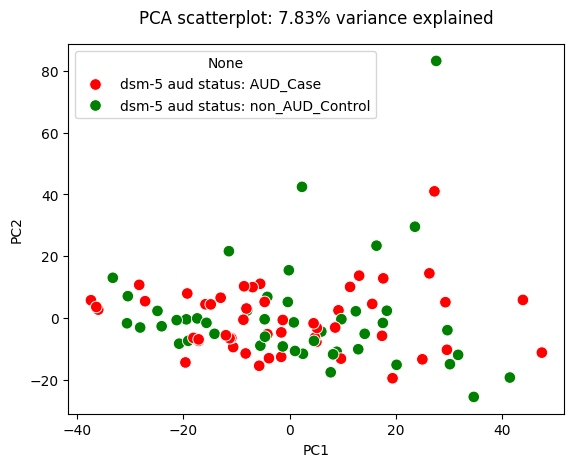

In [73]:
#grab specific row
audstatus = pd.Series(annot_PFC.iloc[3].values, index = list(annot_PFC.columns))
audstatus

#assign value based on control/case
colorsAUD = {'dsm-5 aud status: non_AUD_Control':0, 'dsm-5 aud status: AUD_Case':1}
cAUD=audstatus.map(colorsAUD)
cAUD

# make PCA
pcaAUD = PCA()
AUDcountsPCA = pcaAUD.fit_transform(transposecounts25pca_PFC)
variance_explained=pcaAUD.explained_variance_ratio_
pc1_variance=pcaAUD.explained_variance_ratio_[0]
pc2_variance=pcaAUD.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=AUDcountsPCA[:, 0], y=AUDcountsPCA[:, 1], s=70, hue=audstatus, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

## Male vs Female

7.829549485816657 4.3240880605367735


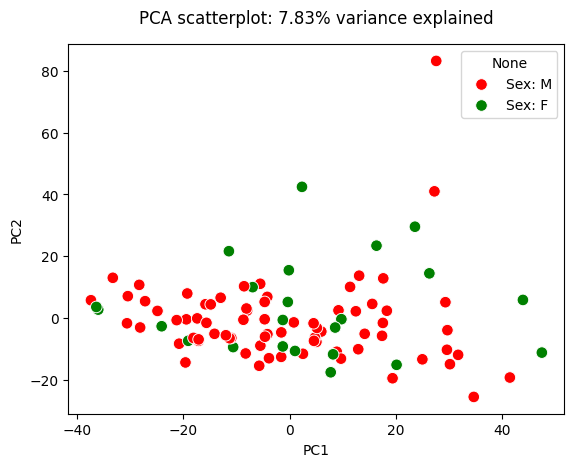

In [74]:
#grab specific row
gender = pd.Series(annot_PFC.iloc[4].values, index = list(annot_PFC.columns))
gender

#assign value based on control/case
colorsGender = {'Sex: M':0, 'Sex: F':1}
cGender=gender.map(colorsGender)
cGender

# make PCA
pcaGender = PCA()
GendercountsPCA = pcaGender.fit_transform(transposecounts25pca_PFC)
variance_explained=pcaGender.explained_variance_ratio_
pc1_variance=pcaGender.explained_variance_ratio_[0]
pc2_variance=pcaGender.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=GendercountsPCA[:, 0], y=GendercountsPCA[:, 1], s=70, hue=gender, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

## Depressed vs Not Depressed

7.829549485816657 4.3240880605367735


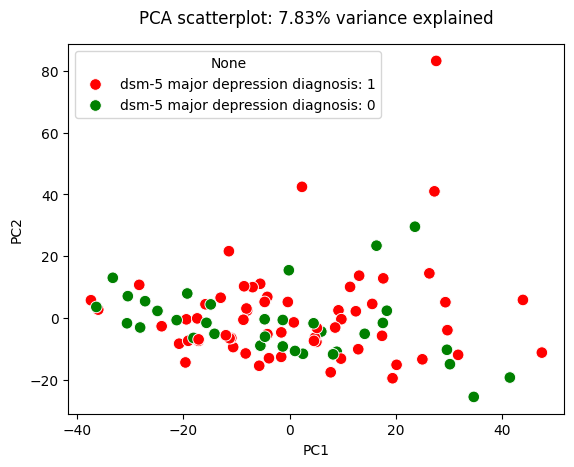

In [75]:
#grab specific row
depressionStatus = pd.Series(annot_PFC.iloc[6].values, index = list(annot_PFC.columns))
depressionStatus

#assign value based on control/case
colorsDepressed = {'dsm-5 major depression diagnosis: 0':0, 'dsm-5 major depression diagnosis: 1':1}
cDepressed=gender.map(colorsDepressed)
cDepressed

# make PCA
pcaDepressed = PCA()
DepressedcountsPCA = pcaDepressed.fit_transform(transposecounts25pca_PFC)
variance_explained=pcaDepressed.explained_variance_ratio_
pc1_variance=pcaDepressed.explained_variance_ratio_[0]
pc2_variance=pcaDepressed.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=DepressedcountsPCA[:, 0], y=DepressedcountsPCA[:, 1], s=70, hue=depressionStatus, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

## Smoke vs No Smoke

7.829549485816657 4.3240880605367735


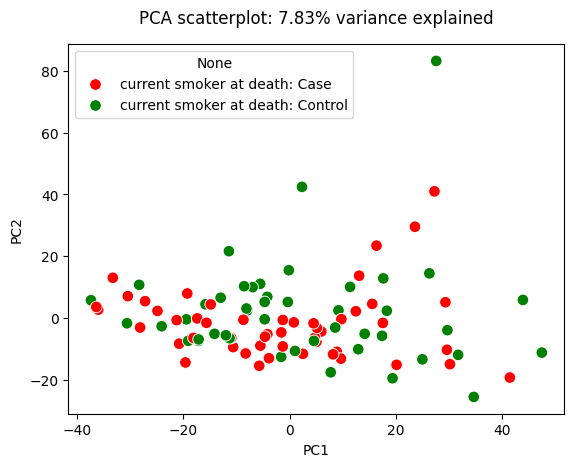

In [76]:
#grab specific row
smokingStatus = pd.Series(annot_PFC.iloc[7].values, index = list(annot_PFC.columns))
smokingStatus

#assign value based on control/case
colorsSmoke = {'current smoker at death: Control':0, 'current smoker at death: Case':1}
cSmoke=gender.map(colorsSmoke)
cSmoke

# make PCA
pcaSmoke = PCA()
SmokecountsPCA = pcaSmoke.fit_transform(transposecounts25pca_PFC)
variance_explained=pcaSmoke.explained_variance_ratio_
pc1_variance=pcaSmoke.explained_variance_ratio_[0]
pc2_variance=pcaSmoke.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=SmokecountsPCA[:, 0], y=SmokecountsPCA[:, 1], s=70, hue=smokingStatus, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

## Age Death

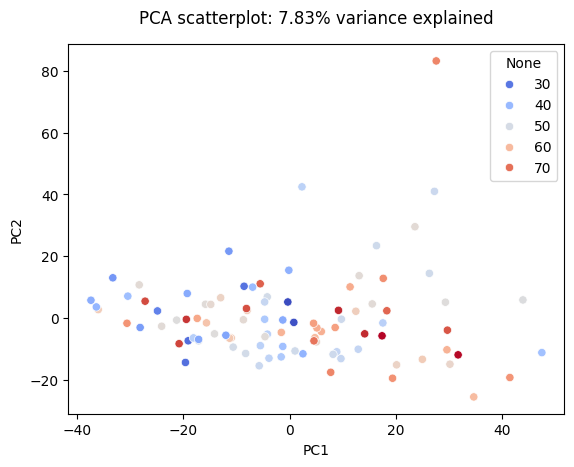

In [77]:
# Grab the 'agedeath' values
age = pd.Series(annot_PFC.iloc[5].values, index=list(annot_PFC.columns))

# Clean them
age_clean = age.apply(lambda x: float(x.split(':')[1].strip()))

# Do PCA
pcaAge = PCA()
AgecountsPCA = pcaAge.fit_transform(transposecounts25pca_PFC)

variance_explained = pcaAge.explained_variance_ratio_
pc1_variance = variance_explained[0]
pc2_variance = variance_explained[1]

# Scatterplot
sns.scatterplot(x=AgecountsPCA[:, 0], y=AgecountsPCA[:, 1], hue=age_clean, palette='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()


## Look at whether sv1-sv12 are affecting the PCA

In [23]:
# This finds all row indexes where 'sv1:' appears in any cell
sv1_rows = annot.index[
    annot.applymap(str).apply(lambda row: row.apply(lambda x: 'sv1:' in x)).any(axis=1)
]

print(sv1_rows)


Index(['!Sample_characteristics_ch1'], dtype='object', name='!Sample_title')


/tmp/ipykernel_4069296/3560482264.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot.applymap(str).apply(lambda row: row.apply(lambda x: 'sv1:' in x)).any(axis=1)


In [25]:
# Assume idx_sv1 is the correct index you found
sv1_row = annot.iloc[14].astype(str)

# Extract the float values
SV1 = sv1_row.apply(lambda x: float(x.split(':')[1].strip()))

In [26]:
# Extract the float values for sv1
SV1 = sv1_row.apply(lambda x: float(x.split('sv1:')[1].split(';')[0].strip()))

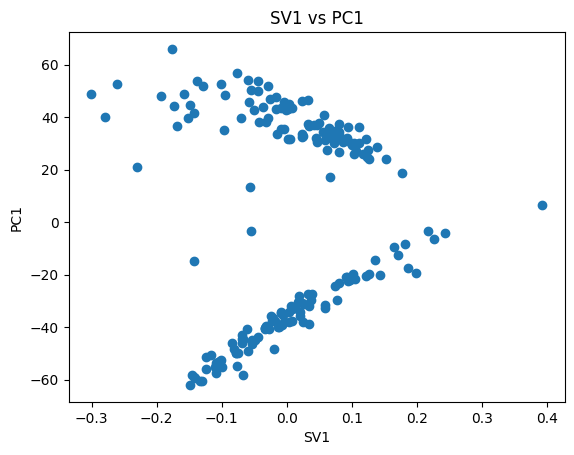

In [27]:
plt.scatter(SV1, GendercountsPCA[:, 0])
plt.xlabel('SV1')
plt.ylabel('PC1')
plt.title('SV1 vs PC1')
plt.show()

# Filter for NAc

In [42]:
# filter counts to only have samples in the NAc
bool_NAc = annot.iloc[1] == 'Nucleus Accumbens'
#counts = counts.drop('variance', axis = 1)
counts.columns = bool_NAc.index
counts_NAc = counts.loc[:,bool_NAc]

In [45]:
counts_NAc

,R15181,R15183,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21951,R21952,R21954,R21955,R21956,R21958,R21959,R21960,R21961,R21962
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000259976.3,-2.519063,-2.558822,1.065913,0.788256,-2.603460,-2.671445,-2.639801,1.027146,0.906429,-2.495750,...,-2.589211,0.753827,1.313131,1.143211,1.332759,-2.297293,-2.393157,-2.566943,0.790930,1.272954
ENSG00000260075.1,1.244365,-2.558822,-2.406844,-2.700295,-2.603460,1.412058,-2.639801,1.592462,1.223812,1.125426,...,-2.589211,0.566356,-2.722299,1.025696,-1.124618,-2.297293,-2.393157,-2.566943,-2.627372,-2.596864
ENSG00000260186.5,0.093720,0.436813,0.931613,0.785427,1.042944,1.191283,1.050396,0.978503,1.208972,1.123343,...,1.232957,0.761251,1.031284,0.489530,0.851579,0.194069,0.445692,0.961974,0.509349,0.881702
ENSG00000134184.13,1.209290,-2.558822,-2.406844,-1.700295,-2.603460,1.668801,1.236994,-1.452861,1.269472,-1.495750,...,1.556297,1.175091,-1.245178,-2.523307,1.423567,-0.255900,-1.393157,1.173420,-1.025312,1.016978
ENSG00000196273.8,0.300480,0.131374,0.826152,0.746863,0.632069,0.652838,0.791563,0.869359,0.769890,0.644129,...,0.772517,0.926578,0.937617,0.764495,0.763749,0.374805,0.451941,0.861192,0.649090,0.783347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198218.11,1.641705,1.615238,1.625372,1.747948,1.653979,1.677250,1.673645,1.739428,1.698984,1.676268,...,1.731973,1.752828,1.729180,1.706375,1.682240,1.679057,1.691419,1.703503,1.742215,1.749489
ENSG00000204435.15,1.417953,1.502631,1.419231,1.514019,1.491011,1.518046,1.514623,1.516089,1.479787,1.461857,...,1.448614,1.518458,1.546747,1.500768,1.508177,1.547185,1.421090,1.414876,1.557320,1.504195
ENSG00000180304.14,1.646478,1.800064,1.731143,1.781148,1.783396,1.804081,1.801266,1.811957,1.765582,1.782546,...,1.788642,1.842879,1.827807,1.834247,1.821998,1.814642,1.814477,1.723981,1.801411,1.832242


In [54]:
# filter annot for only NAc
annot_NAc = annot.loc[:, bool_NAc]

In [55]:
annot_NAc

,R15181,R15183,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21951,R21952,R21954,R21955,R21956,R21958,R21959,R21960,R21961,R21962
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_geo_accession,GSM8015128,GSM8015129,GSM8015130,GSM8015131,GSM8015132,GSM8015133,GSM8015134,GSM8015135,GSM8015136,GSM8015137,...,GSM8015216,GSM8015217,GSM8015218,GSM8015219,GSM8015220,GSM8015221,GSM8015222,GSM8015223,GSM8015224,GSM8015225
!Sample_source_name_ch1,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,...,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens
!Sample_characteristics_ch1,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,...,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens
!Sample_characteristics_ch1,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,...,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case
!Sample_characteristics_ch1,Sex: M,Sex: M,Sex: M,Sex: F,Sex: M,Sex: F,Sex: M,Sex: M,Sex: M,Sex: M,...,Sex: M,Sex: M,Sex: M,Sex: F,Sex: M,Sex: M,Sex: M,Sex: M,Sex: F,Sex: F
!Sample_characteristics_ch1,agedeath: 31.54,agedeath: 35.25,agedeath: 61.75,agedeath: 38.39,agedeath: 46.79,agedeath: 52.69,agedeath: 38.99,agedeath: 65.59057723,agedeath: 52.92,agedeath: 43.11,...,agedeath: 62.07802875,agedeath: 47.8110883,agedeath: 49.41010723,agedeath: 29.12251882,agedeath: 73.63449692,agedeath: 55.41672371,agedeath: 78.37907826,agedeath: 47.28542094,agedeath: 24.76374629,agedeath: 37.4701118
!Sample_characteristics_ch1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,...,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0
!Sample_characteristics_ch1,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,...,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,current smoker at death: Control,current smoker at death: Control,curre

In [46]:
# calculate variance again
#calculate variance for each row and add as new column
counts_NAc['variance'] = counts.var(axis=1)

#sort by variance
counts_NAc.sort_values(by='variance', ascending=False, inplace=True)
counts_NAc

#take top 4748 (approx 25%) of highest variance
counts25pca_NAc = counts_NAc.head(4748)

#delete variance column
counts25pca_NAc = counts25pca_NAc.drop('variance', axis = 1)

/tmp/ipykernel_3766735/3060476004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_NAc['variance'] = counts.var(axis=1)
/tmp/ipykernel_3766735/3060476004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_NAc.sort_values(by='variance', ascending=False, inplace=True)


In [47]:
#transpose selected counts data
transposecounts25pca_NAc = counts25pca_NAc.T.values
transposecounts25pca_NAc = preprocessing.StandardScaler().fit_transform(transposecounts25pca_NAc)
transposecounts25pca_NAc

array([[-1.27993625,  0.9799237 , -2.92654437, ...,  0.98761437,
        -0.0793746 , -1.53113495],
       [-1.30242691, -1.1074365 , -1.66302037, ...,  0.45593922,
         0.60655962,  0.45643705],
       [ 0.74801866, -1.02402404,  0.15920069, ...,  1.78353094,
        -1.47171751, -1.35429386],
       ...,
       [-1.30702088, -1.11189375,  0.2710123 , ..., -1.11686313,
        -1.72280788, -1.60658597],
       [ 0.59246578, -1.14505973, -1.39589024, ..., -1.21113987,
        -0.24923903,  0.62590602],
       [ 0.86513816, -1.12831578, -0.02460652, ..., -1.16354398,
        -0.2013927 , -0.07788917]])

## AUD vs Non AUD

8.024366530187505 5.486763910146642


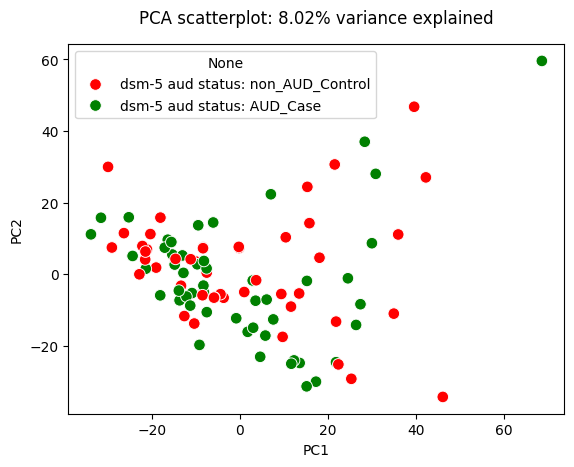

In [57]:
#grab specific row
audstatus = pd.Series(annot_NAc.iloc[3].values, index = list(annot_NAc.columns))
audstatus

#assign value based on control/case
colorsAUD = {'dsm-5 aud status: non_AUD_Control':0, 'dsm-5 aud status: AUD_Case':1}
cAUD=audstatus.map(colorsAUD)
cAUD

# make PCA
pcaAUD = PCA()
AUDcountsPCA = pcaAUD.fit_transform(transposecounts25pca_NAc)
variance_explained=pcaAUD.explained_variance_ratio_
pc1_variance=pcaAUD.explained_variance_ratio_[0]
pc2_variance=pcaAUD.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=AUDcountsPCA[:, 0], y=AUDcountsPCA[:, 1], s=70, hue=audstatus, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

## Male vs Female

8.024366530187505 5.486763910146642


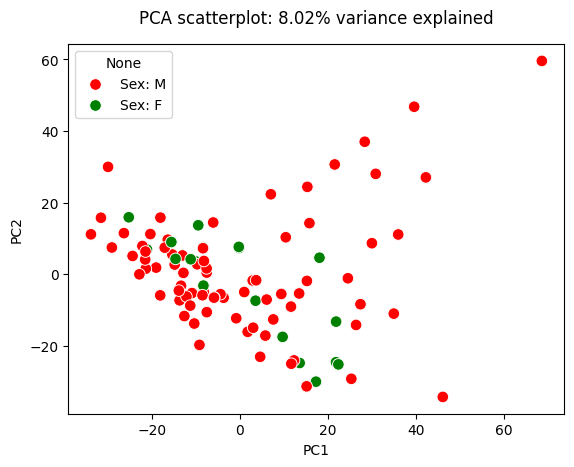

In [58]:
#grab specific row
gender = pd.Series(annot_NAc.iloc[4].values, index = list(annot_NAc.columns))
gender

#assign value based on control/case
colorsGender = {'Sex: M':0, 'Sex: F':1}
cGender=gender.map(colorsGender)
cGender

# make PCA
pcaGender = PCA()
GendercountsPCA = pcaGender.fit_transform(transposecounts25pca_NAc)
variance_explained=pcaGender.explained_variance_ratio_
pc1_variance=pcaGender.explained_variance_ratio_[0]
pc2_variance=pcaGender.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=GendercountsPCA[:, 0], y=GendercountsPCA[:, 1], s=70, hue=gender, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

## Depressed vs Not Depressed

8.024366530187505 5.486763910146642


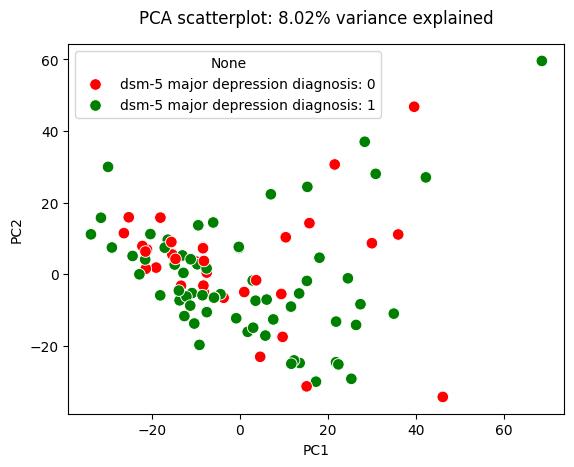

In [59]:
#grab specific row
depressionStatus = pd.Series(annot_NAc.iloc[6].values, index = list(annot_NAc.columns))
depressionStatus

#assign value based on control/case
colorsDepressed = {'dsm-5 major depression diagnosis: 0':0, 'dsm-5 major depression diagnosis: 1':1}
cDepressed=gender.map(colorsDepressed)
cDepressed

# make PCA
pcaDepressed = PCA()
DepressedcountsPCA = pcaDepressed.fit_transform(transposecounts25pca_NAc)
variance_explained=pcaDepressed.explained_variance_ratio_
pc1_variance=pcaDepressed.explained_variance_ratio_[0]
pc2_variance=pcaDepressed.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=DepressedcountsPCA[:, 0], y=DepressedcountsPCA[:, 1], s=70, hue=depressionStatus, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

## Smoke vs No Smoke

8.024366530187505 5.486763910146642


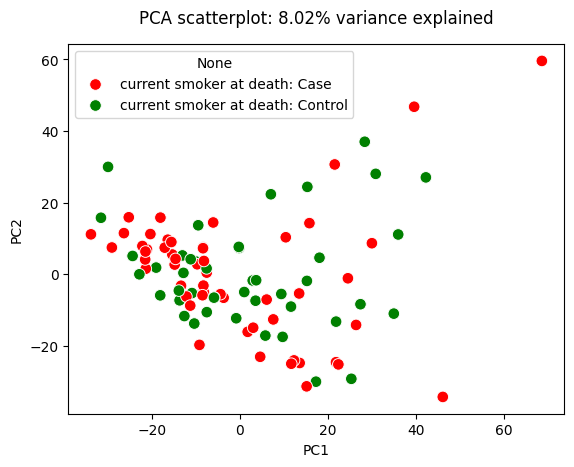

In [60]:
#grab specific row
smokingStatus = pd.Series(annot_NAc.iloc[7].values, index = list(annot_NAc.columns))
smokingStatus

#assign value based on control/case
colorsSmoke = {'current smoker at death: Control':0, 'current smoker at death: Case':1}
cSmoke=gender.map(colorsSmoke)
cSmoke

# make PCA
pcaSmoke = PCA()
SmokecountsPCA = pcaSmoke.fit_transform(transposecounts25pca_NAc)
variance_explained=pcaSmoke.explained_variance_ratio_
pc1_variance=pcaSmoke.explained_variance_ratio_[0]
pc2_variance=pcaSmoke.explained_variance_ratio_[1]

print(pc1_variance*100,pc2_variance*100)

#scatter=plt.scatter(x_new[:,0], x_new[:,1],c=c)
sns.scatterplot(x=SmokecountsPCA[:, 0], y=SmokecountsPCA[:, 1], s=70, hue=smokingStatus, palette=['red', 'green'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()

## Age Death

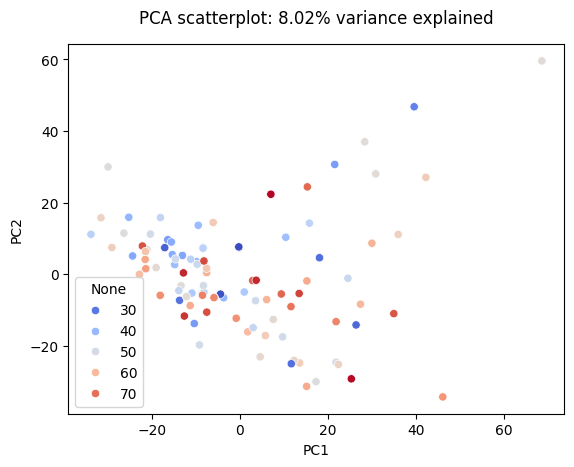

In [61]:
# Grab the 'agedeath' values
age = pd.Series(annot_NAc.iloc[5].values, index=list(annot_NAc.columns))

# Clean them
age_clean = age.apply(lambda x: float(x.split(':')[1].strip()))

# Do PCA
pcaAge = PCA()
AgecountsPCA = pcaAge.fit_transform(transposecounts25pca_NAc)

variance_explained = pcaAge.explained_variance_ratio_
pc1_variance = variance_explained[0]
pc2_variance = variance_explained[1]

# Scatterplot
sns.scatterplot(x=AgecountsPCA[:, 0], y=AgecountsPCA[:, 1], hue=age_clean, palette='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scatterplot: " + str(round(pc1_variance*100,2)) + "% variance explained", pad=15)
plt.show()
